In [286]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_csv('Email.csv')

In [ ]:
df.sample(5)

,Category,Message
827,ham,Hahaha..use your brain dear
5356,ham,Tell me something. Thats okay.
1083,ham,Send to someone else :-)
1804,ham,I'm in class. Did you get my text.
3822,ham,You are right though. I can't give you the spa...


In [ ]:
df.shape

(5572, 2)

#**DATA CLEANING**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['Category'] = encoder.fit_transform(df['Category'])

In [ ]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [ ]:
df.duplicated().sum()

415

#**EDA(EXPLORATORY DATA ANALYSIS)**


In [ ]:
df['Category'].value_counts()

0    4825
1     747
Name: Category, dtype: int64

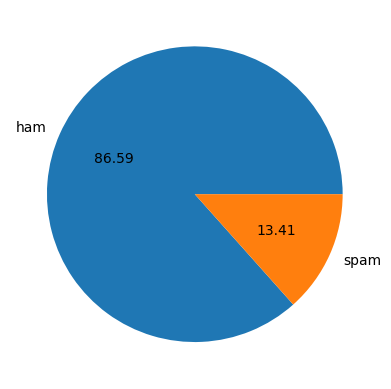

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['Category'].value_counts(), labels=['ham','spam'], autopct='%0.2f')
plt.show()

In [ ]:
import nltk

In [274]:
!pip install nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['num_characters'] = df['Message'].apply(len)

In [ ]:
df.head()

,Category,Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
df['num_words'] = df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,Category,Message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df['num_sentences'] = df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,Category,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5572.000000,5572.000000,5572.000000
mean,80.368988,18.826992,2.004666
std,59.926946,13.853616,1.539516
min,2.000000,1.000000,1.000000
25%,35.750000,9.000000,1.000000
50%,61.000000,15.000000,2.000000
75%,122.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


#**HAM**

In [ ]:
df[df['Category'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.448290,17.425699,1.846010
std,58.434864,14.118631,1.475377
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,93.000000,23.000000,2.000000
max,910.000000,220.000000,38.000000


#**SPAM**

In [ ]:
df[df['Category'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,747.000000,747.000000,747.000000
mean,137.989290,27.878179,3.029451
std,29.980287,7.036282,1.552198
min,7.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

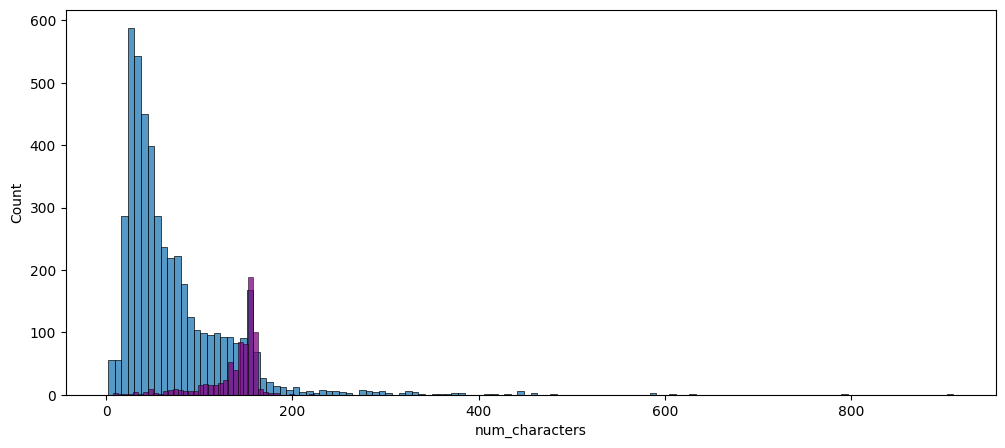

In [ ]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['Category'] == 0]['num_characters'])
sns.histplot(df[df['Category'] == 1]['num_characters'],color ='purple')

<Axes: xlabel='num_words', ylabel='Count'>

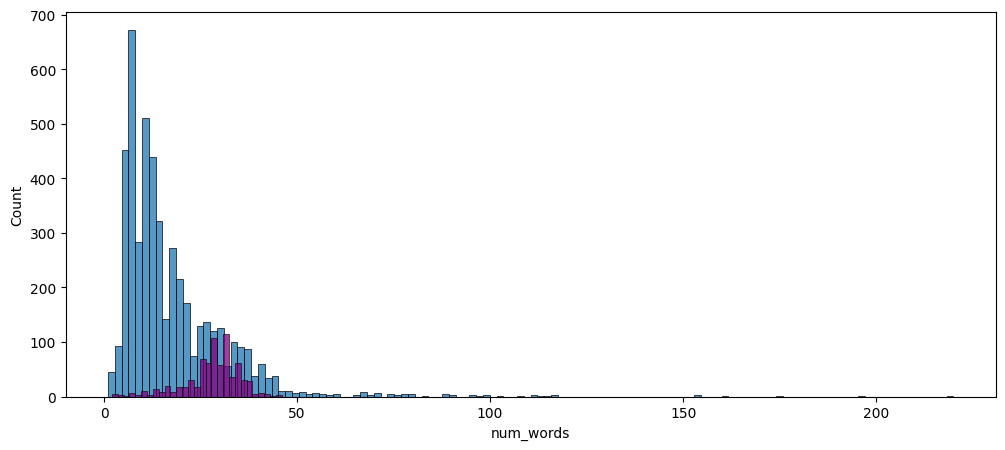

In [ ]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['Category'] == 0]['num_words'])
sns.histplot(df[df['Category'] == 1]['num_words'],color ='purple')

<Axes: xlabel='num_sentences', ylabel='Count'>

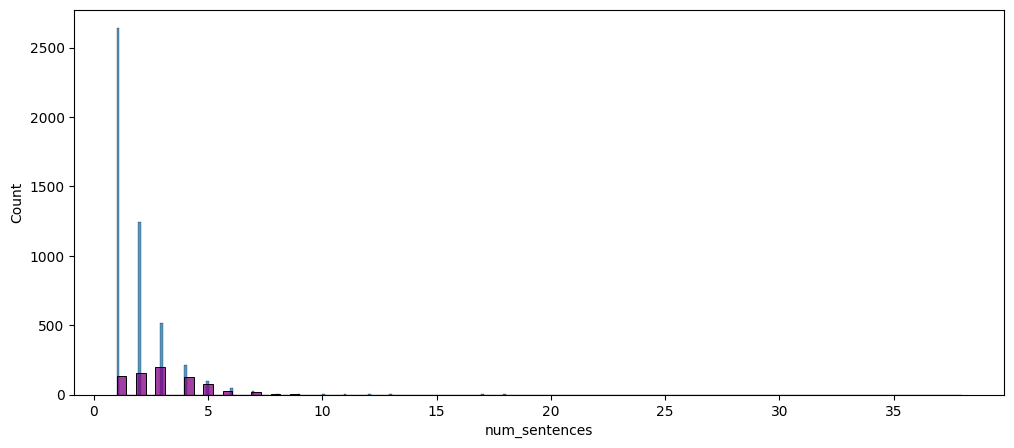

In [ ]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['Category'] == 0]['num_sentences'])
sns.histplot(df[df['Category'] == 1]['num_sentences'],color ='purple')

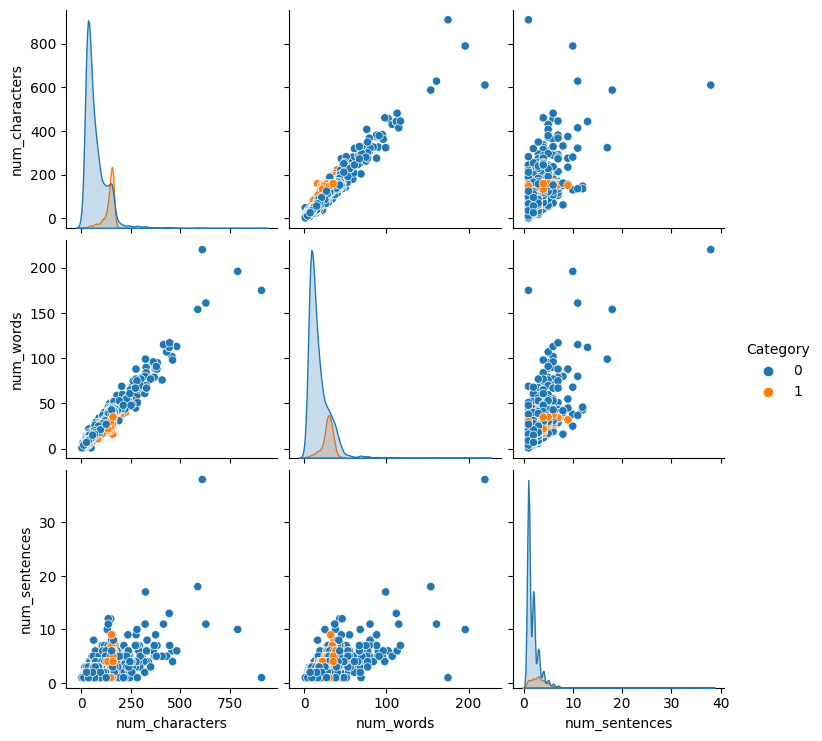

In [ ]:
sns.pairplot(df,hue='Category')


<ipython-input-75-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

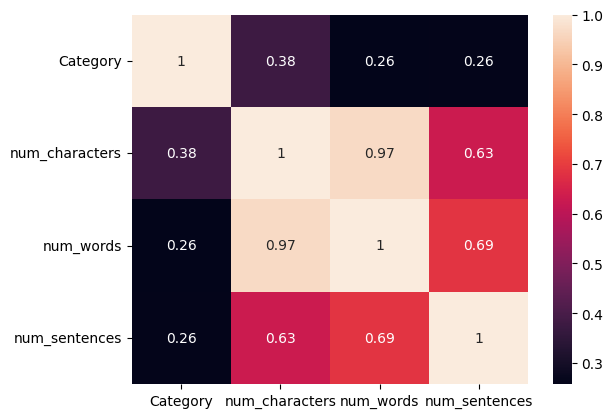

In [ ]:
sns.heatmap(df.corr(),annot=True)

#**DATA PREPROCESSING**

In [ ]:
def transform_text(Message):
  Message = Message.lower()
  Message = nltk.word_tokenize(Message)

  y =[]
  for i in Message:
    if i.isalnum():
      y.append(i)

  Message = y[:]
  y.clear()

  for i in Message:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  Message = y[:]
  y.clear()

  for i in Message:
    y.append(ps.stem(i))


  return " " .join(y)

In [ ]:
transform_text("Im loving youtube lectures on Ml")

'im love youtub lectur ml'

In [ ]:
df['transform_text'] = df['Message'].apply(transform_text)

In [ ]:
df.head()

,Category,Message,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=350,min_font_size=10,background_color='white')

In [ ]:
spam_wc = wc.generate(df[df['Category']==1]['transform_text'].str.cat(sep=''))

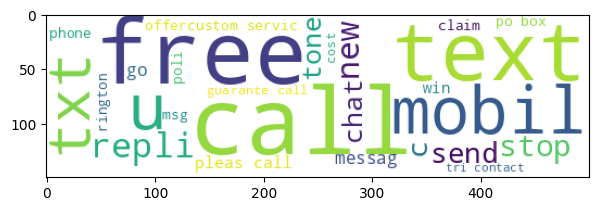

In [ ]:
plt.figure(figsize=(7,4))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['Category']==0]['transform_text'].str.cat(sep=''))

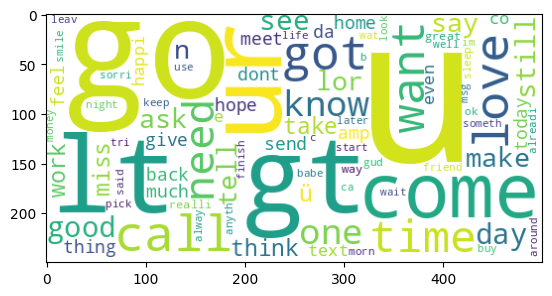

In [ ]:
plt.imshow(ham_wc)

In [ ]:
df.head()

,Category,Message,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
spam_corpus = []
for msg in df[df['Category']==1]['transform_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [ ]:
len(spam_corpus)

11506

In [ ]:
from collections import Counter
(pd.DataFrame(Counter(spam_corpus).most_common(30)))

,0,1
0,call,362
1,free,219
2,2,174
3,txt,169
4,ur,144
5,text,139
6,u,138
7,mobil,135
8,4,120
9,stop,118


In [ ]:
ham_corpus = []
for msg in df[df['Category']==0]['transform_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [ ]:
len(ham_corpus)

38819

In [ ]:
from collections import Counter
(pd.DataFrame(Counter(ham_corpus).most_common(30)))

,0,1
0,u,994
1,go,420
2,get,359
3,gt,318
4,lt,316
5,2,304
6,come,298
7,call,293
8,know,249
9,ur,247


In [ ]:
df.head()

,Category,Message,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# **MODEL BUILDING**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
Tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
x = cv().fit_transform(df['transform_text']).toarray()

In [ ]:
x.shape

(5572, 6781)

In [ ]:
y = df['Category'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [277]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [282]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [283]:
# transform the text data to feature vectors that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer()

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [284]:
print(X_train)

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object


In [285]:
print(X_train_features)

  (0, 5591)	0.5690977835360829
  (0, 3403)	0.3962142772134919
  (0, 4594)	0.38274870785912624
  (0, 2284)	0.37929420133365177
  (0, 3934)	0.31933689575195645
  (0, 2390)	0.3560972364184373
  (1, 4206)	0.14850870903418734
  (1, 7500)	0.12575231570549783
  (1, 3286)	0.23356742056200896
  (1, 3434)	0.24863888769921966
  (1, 1576)	0.1489850750114476
  (1, 3054)	0.26729930485517817
  (1, 6817)	0.204883965246415
  (1, 2832)	0.26729930485517817
  (1, 937)	0.17990063081071436
  (1, 1894)	0.2190517171449065
  (1, 2921)	0.10557329754151569
  (1, 4283)	0.21200560457680895
  (1, 3715)	0.09972295238987999
  (1, 7447)	0.1695584988160503
  (1, 4909)	0.14874604136205302
  (1, 6769)	0.11349051404862
  (1, 6239)	0.11876886576185115
  (1, 2845)	0.2537790500257035
  (1, 7660)	0.2183037355553489
  :	:
  (4455, 3995)	0.28007076122039465
  (4455, 4871)	0.27669278863530977
  (4455, 4801)	0.1634263438044151
  (4455, 7148)	0.17690260531267968
  (4455, 3607)	0.13292987710754373
  (4455, 4047)	0.28185851076945057

# **MODEL TRAINING**

In [297]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [298]:
nb.fit(x_train, y_train)

MultinomialNB()

In [299]:
x_test = cv.transform(X_test)

In [300]:
len(x_test.toarray())

1115

In [301]:
len(x_test.toarray()[0])

7694

In [309]:
print("Training Accuracy:")
nb.score(x_train,y_train)

Training Accuracy:


0.9930446488669509

# EVALUATION OF TRAINING MODEL

In [289]:
# prediction on training data

prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [290]:
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9730760601301324


In [291]:
# prediction on test data

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [292]:
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9775784753363229


EVALUATION FUNCTION

In [316]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('This is a Ham mail')

else:
  print('This is a spam mail')

[1]
This is a Ham mail
